<a href="https://colab.research.google.com/github/gabriela-regueira/Python_Practicing/blob/main/University.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Universities based on their features using K Mean Method
**Context**

The goal of this project is to classify Universities in "Public" or "Private" based on its attributes.

The K Mean is an unsupervised method, which means we usually use this algorithm when we DON'T have the correct labels to train the model. However, for didatic purposes, in this project we will compare the model's clustering with the real clusters, in order to analyse its performance.

**Importing libraries and loading data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Understanding the Data**

The data frame has 777 observations on the following 18 variables.

1. Private: A factor with levels No and Yes indicating private or public university
2. Apps: Number of applications received
3. Accept: Number of applications accepted
4. Enroll: Number of new students enrolled
5. Top10perc: Pct. new students from top 10% of H.S. class
6. Top25perc: Pct. new students from top 25% of H.S. class
7. F.Undergrad: Number of fulltime undergraduates
8. P.Undergrad: Number of parttime undergraduates
9. Outstate: Out-of-state tuition
10. Room.Board: Room and board costs
11. Books: Estimated book costs
12. Personal: Estimated personal spending
13. PhD: Pct. of faculty with Ph.D.’s
14. Terminal: Pct. of faculty with terminal degree
15. S.F.Ratio: Student/faculty ratio
16. perc.alumni: Pct. alumni who donate
17. Expend: Instructional expenditure per student
18. Grad.Rate: Graduation rate

In [ ]:
college_data.head(3)

Unnamed: 0 Private  Apps  ...  perc.alumni  Expend  Grad.Rate
0  Abilene Christian University     Yes  1660  ...           12    7041         60
1            Adelphi University     Yes  2186  ...           16   10527         56
2                Adrian College     Yes  1428  ...           30    8735         54

[3 rows x 19 columns]

First, lets transform the first column into the Data frame index.

In [48]:
college_data = pd.read_csv('College_Data', index_col=0)


**Exploratory Data Analysis**

Let's check, according to the real labels, how the attributes correlates.

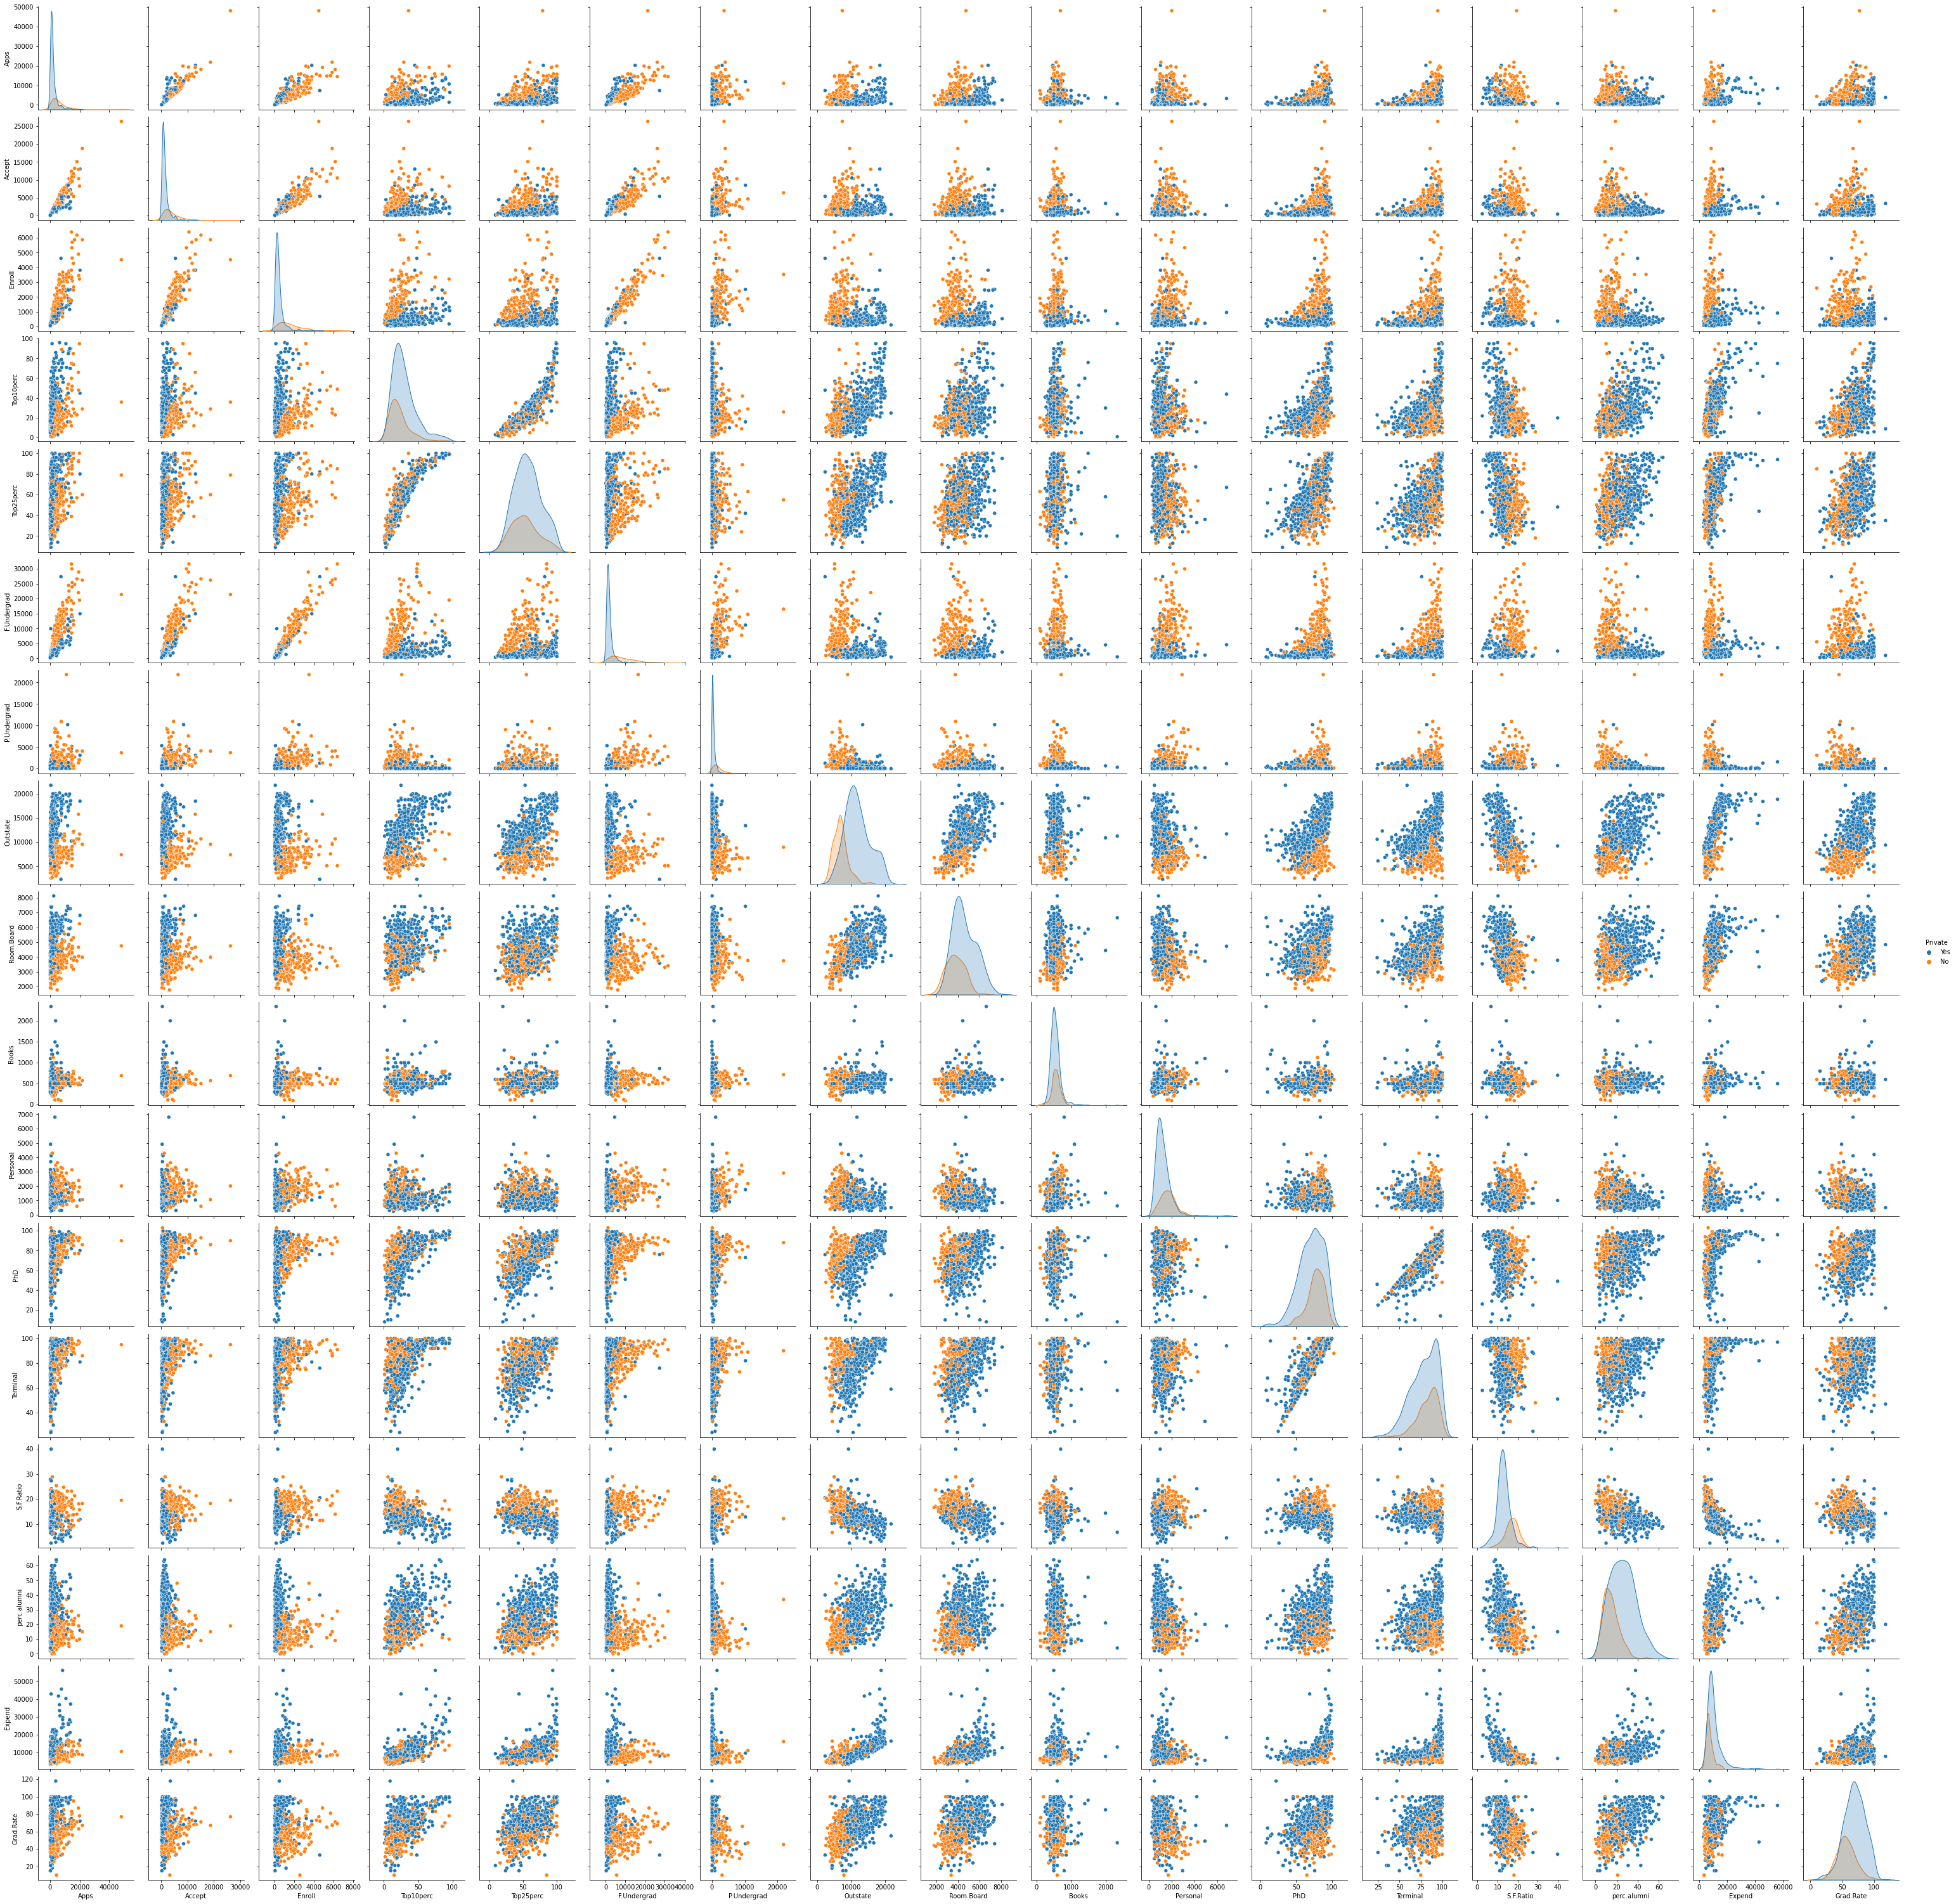

In [ ]:
sns.pairplot(data=college_data, hue='Private')

As we can see, some attributes clearly segregate the classes, while others relations do not contribute to this distinctiveness.

For example, the number of applications received (Apps) outputs clearly separated classes in its plots, while "Top10perc" and "Top25perc" shows pretty mixed colors plot.

We can expect that "Apps" is a relevant attribute to consider to the model, while "Top10perc" and "Top25perc" are not that good for this case.

The number of applications received (Apps) in Public Universities are much higher than in Private. While de percentage of new students from top 25% of H.S. class, are almost the same in Public and Privates Universities.

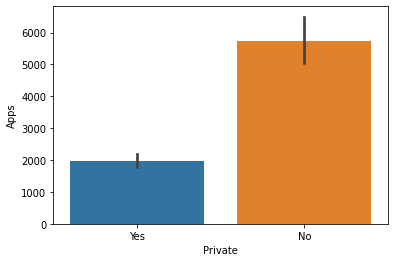

In [ ]:
sns.barplot(x='Private', y='Apps', data=college_data)

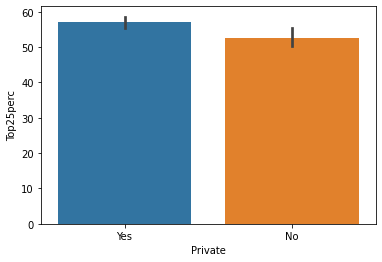

In [ ]:
sns.barplot(x='Private', y='Top25perc', data=college_data)

**Implementing K Means model**
1. Importing model algorithm

In [23]:
from sklearn.cluster import KMeans

2. Create a instance of a K Means model with 2 clusters

In [ ]:
kmeans = KMeans(n_clusters=2)

3. Fit the model to all the data **EXCEPT** the "Private" column

In [49]:
college_clean = college_data.drop('Private', axis=1)

In [ ]:
kmeans.fit(college_clean)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

**Evaluting the model performance**

First, we need to convert the "Private" attribute into a numeric variable

In [46]:
college_private=college_data.astype({'Private':'category'})

In [47]:
college_private['Private_num']=college_data['Private'].cat.codes

Importing model metrics to evaluate the model

In [7]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(college_private['Private_num'],kmeans.labels_))
print(classification_report(college_private['Private_num'],kmeans.labels_))

[[ 74 138]
 [ 34 531]]
              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



As we can see, the accuracy is 78%, which is acceptable for an unsupervised learning. The recall, and consequentely the f1-score are low for class 0. It probably relates to the fact that the database is not balanced. There are much more 1 class than 0.

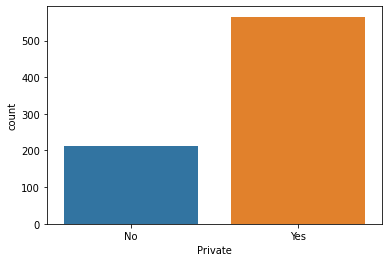

In [ ]:
sns.countplot(x='Private', data=college_data)

Let's assign **weight to the samples**. Making the "No" clustering 2 times "heaviest" than "Yes".

In [24]:
kmeans_2 = KMeans(n_clusters=2)

In [40]:
def converter (private):
  if private == 'Yes':
    return 1
  else:
    return 2  
weights = college_data['Private'].apply(converter)

In [41]:
kmeans_2.fit(college_clean,sample_weight=weights)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [42]:
print(confusion_matrix(college_private['Private_num'],kmeans_2.labels_))
print(classification_report(college_private['Private_num'],kmeans_2.labels_))

[[ 74 138]
 [ 28 537]]
              precision    recall  f1-score   support

           0       0.73      0.35      0.47       212
           1       0.80      0.95      0.87       565

    accuracy                           0.79       777
   macro avg       0.76      0.65      0.67       777
weighted avg       0.78      0.79      0.76       777



We had a little improvement in accuracy and precision!

**Conclusion**

The K Means algorithm is an unsupervised learning, used to cluster a data when there is unknown labels to assign. In this example, we do HAVE the labels, and the number of clusters we want the data to be splitted, which leads to a easier way of evaluating the model performance.
In general, the model performes well, clustering the Universities in Public or Private based only on basic attributes.